# Analysis of excitonic states for $C_6H_6$

In [1]:
%autosave 0
from BigDFT import Logfiles as lf
from BigDFT import Calculators as C
from futile import Yaml
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import sys
sys.path.insert(0,'../../')
import Routine as R
outputpath = 'linear-response/'

Autosave disabled


Set up of the main parameters

In [2]:
rVal = [7.0, 9.0]
virtMax = [235, 239]
numOrb = 15 # number of occupied orbitals

Read the dipoles and coupling matrix (for a single value of rVal specified by rmultInd)

In [3]:
rmultInd = 1
print 'Read data for rmult = ', rVal[rmultInd]
print 'Maximum value of virtual orbitals = ', virtMax[rmultInd]
print ''

%cd $outputpath
dpath = 'log/TDDFT-Results/transition_dipoles_rmult'+str(rVal[rmultInd])+'_numVirt'+str(virtMax[rmultInd])+'.txt'
dipoles = np.loadtxt(dpath)
cpath = 'log/TDDFT-Results/coupling_matrix_rmult'+str(rVal[rmultInd])+'_numVirt'+str(virtMax[rmultInd])+'.txt'
Cmat = np.loadtxt(cpath)
logpath = 'log/log-Rmult_'+str(rVal[rmultInd])+'_numVirt_'+str(virtMax[rmultInd])+'.yaml'
log = !ls $logpath
Data = lf.Logfile(log[0])
%cd ..

Cmat.shape

Read data for rmult =  9.0
Maximum value of virtual orbitals =  239

/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/C6H6/free-bc/linear-response
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/C6H6/free-bc


(7170, 7170)

## Convergence of the excitation with respect to $n_\alpha$

We define the list nalpha used to analyze the convergence of the excitations with respect to the number of virtual orbitals

In [4]:
nalpha = [64,128,192,virtMax[rmultInd]] #rVal = 7.0 and 9.0
#nalpha = [virtMax[rmultInd]] # single nalpha analysis
print nalpha
print 'emax = ', R.engMax(Data,numOrb,virtMax[rmultInd]), 'eV'

[64, 128, 192, 239]
emax =  12.0990705409 eV


We solve the eigenproblems

In [5]:
reload(R)
eigenproblems = R.solveEigenProblems(numOrb,virtMax[rmultInd],Cmat,dipoles,nalpha)

(1920, 1920)
(3840, 3840)
(5760, 5760)
(7170, 7170)


We build the dictionary with the first excitations (for each na) and remove the degeneracies

In [6]:
reload(R)
exc = [i for i in range(1,100)]
excitations = R.buildExcitations(numOrb,nalpha,exc,eigenproblems)
#excitations = R.removeDegenarices(excitations)

The list allTr contains the labels of the transitions considered (the procedure consider only the transitions that appears for all the values of nalpha). The list is sorted with increasing energy (for each transition it consider the energy of the highest na).

In [7]:
reload(R)
allTr = R.allTransitions(excitations)
print 'Number of transition', len(allTr)
print allTr

[64, 128, 192, 239]
Number of transition 93
['14,15to1,2-0', '14,15to1,2-1', '14,15to1,2-2', '14,15to1,2-3', '14,15to1,2-4', '15to3-0', '14to3-0', '15to3-1', '14to3-1', '14,15to1,2-5', '14,15to4,5-0', '14,15to4,5-1', '14,15to4,5-2', '14,15to4,5-3', '14,15to4,5-4', '14,15to4,5-5', '14,15to4,5-6', '14,15to4,5-7', '12,13to1,2-0', '12,13to1,2-1', '12,13to1,2-2', '12,13to1,2-3', '14,15to1,2,6-0', '14,15to1,2,6-1', '12,13to1,2-4', '12,13to1,2-5', '12,13to1,2-6', '15to6-0', '14to6-0', '12,13to1,2-7', '14,15to7,8-0', '14,15to7,8-1', '14,15to7,8-2', '14,15to7,8-3', '14,15to7,8-4', '14,15to7,8-5', '14,15to7,8-6', '14,15to7,8-7', '15to9-0', '14to9-0', '15to9-1', '14to9-1', '14,15to10,11-0', '14,15to10,11-1', '14,15to10,11-2', '14,15to10,11-3', '14,15to10,11-4', '14,15to10,11-5', '14,15to10,11-6', '14,15to10,11-7', '13to3-0', '12to3-0', '13to3-1', '12to3-1', '15to12-0', '14to12-0', '15to12-1', '14to12-1', '15to13-0', '14to13-0', '15to13-1', '14to13-1', '15to14-0', '14to14-0', '15to14-1', '14to14-1

We remove the transitions that are not in allTr from excitations

In [8]:
for na in nalpha:
    transitions = excitations[na].keys()
    for tr in transitions:
        if tr not in allTr:
            del excitations[na][tr]
    print 'na = ', na,' - number of transitions', len(transitions)

na =  64  - number of transitions 99
na =  128  - number of transitions 99
na =  192  - number of transitions 99
na =  239  - number of transitions 99


We add the key oscillator strenght

In [9]:
fAvg = R.evalOscStrenghtAvg(eigenproblems)
for na,e in excitations.iteritems():
    for tr in e:
        level = excitations[na][tr]['level']
        os = 0.0
        for l in range(len(level)):
            os+=fAvg[na][l-1]
        e[tr]['oscillatorStrenght'] = os

Display the energy of the lower excitations ($E_{homo}$ for $C_6H_6$ is 6.51 eV)

In [10]:
for a in allTr[0:99]:
    print a, excitations[virtMax[rmultInd]][a]['energy']

14,15to1,2-0 4.31336918688
14,15to1,2-1 4.68390140605
14,15to1,2-2 4.68394937228
14,15to1,2-3 4.96399286364
14,15to1,2-4 5.25292922007
15to3-0 6.00600576845
14to3-0 6.00619912944
15to3-1 6.02884987555
14to3-1 6.02905700391
14,15to1,2-5 6.11680831262
14,15to4,5-0 6.56798753961
14,15to4,5-1 6.59109194473
14,15to4,5-2 6.59111206512
14,15to4,5-3 6.59391707857
14,15to4,5-4 6.59392876136
14,15to4,5-5 6.59846853092
14,15to4,5-6 6.61330022345
14,15to4,5-7 6.61345155191
12,13to1,2-0 6.72009161642
12,13to1,2-1 6.73924757652
12,13to1,2-2 6.73932383281
12,13to1,2-3 6.76120213508
14,15to1,2,6-0 6.83174129695
14,15to1,2,6-1 6.83191953054
12,13to1,2-4 6.88008659882
12,13to1,2-5 6.99220902384
12,13to1,2-6 6.99226537287
15to6-0 6.99831921959
14to6-0 6.99851899257
12,13to1,2-7 7.02474949911
14,15to7,8-0 7.19290263906
14,15to7,8-1 7.20237380696
14,15to7,8-2 7.2023851253
14,15to7,8-3 7.2032691092
14,15to7,8-4 7.21227310982
14,15to7,8-5 7.21716878693
14,15to7,8-6 7.21719162022
14,15to7,8-7 7.23296601652
15

We define a routine to plot the energy of the excitations (specified in the list using the level of the excitations) in function of the number of virtual orbitals. 

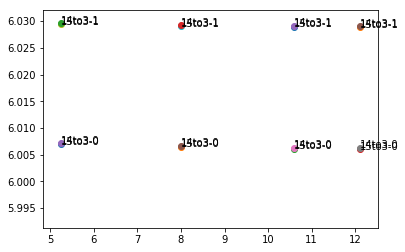

In [11]:
%matplotlib inline
reload(R)
selTr = [6,7,8,9] #the routine count 2 times the degenerate excitations
#selTr = [28,29,30]
R.pltTrLevel(selTr,excitations,Data,numOrb,True)

Transitions energies can be also plotted specifying the values of the transition labels

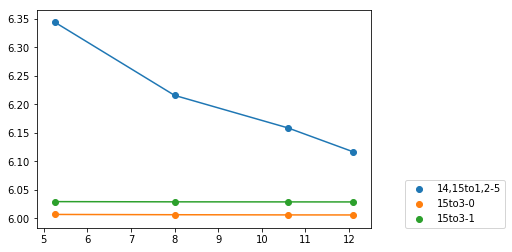

In [12]:
reload(R)
selLab = ['14,15to1,2-5','15to3-0','15to3-1']
R.pltTrLabel(selLab,excitations,Data,numOrb,True)

COMMENT:
 * Transition '14,15to1,2-5' has a strong dependence on the nalpha and at 12 eV realizes a crossover with respect to the other excitations. The crossover is only visible at rmult = 7 since at rmult = 9 the maximum accessible energy is not sufficient.
 * The less clear behavior is due to the excitations 15to3-0 and 1, that are stable with respect to nalpha but seems to have an energy which is different (of about 0.1) for rmult 7 and 9...

Save the excitation dictionary on a file for a further compared analysis in other notebook

In [13]:
excList = {}
for na,e in excitations.iteritems():
    val = {}
    for tr,v in e.iteritems():
        val[tr] = {'weightP' : v['weightP'].tolist(),'weightAlpha' : v['weightAlpha'].tolist(),'level' : v['level'], 'energy' : v['energy'].tolist(), 'oscillatorStrenght' : v['oscillatorStrenght'].tolist()}
    excList[na] = val

In [14]:
print 'Save data for rmult = ', rVal[rmultInd]
print 'Maximum value of virtual orbitals = ', virtMax[rmultInd]
print ''

filename = outputpath+'log/excitations_rmult_'+str(rVal[rmultInd])+'.yaml'
#filename = outputpath+'log/excitations_singlena_rmult_'+str(rVal[rmultInd])+'.yaml' # for the single na analysis
print filename
Yaml.dump(excList,filename)

Save data for rmult =  9.0
Maximum value of virtual orbitals =  239

linear-response/log/excitations_rmult_9.0.yaml
